(-0.5, 613.5, 457.5, -0.5)

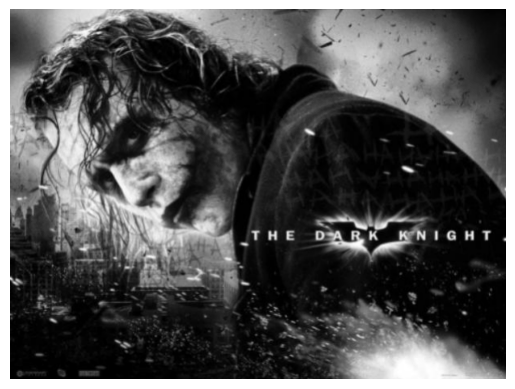

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread(r"C:\Users\student\Pictures\Screenshots\Screenshot 2025-04-24 111310.png")
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')
plt.axis('off')


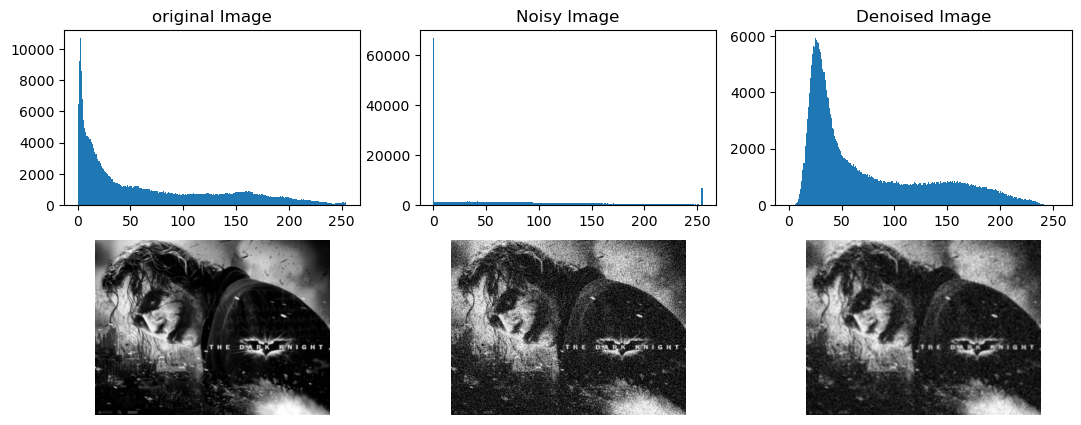

In [2]:
guass_noise=np.random.normal(0,55,image.shape)
guass_image=np.clip(image+guass_noise,0,255)
guass_denoised=cv2.GaussianBlur(guass_image,(7,7),0)
plt.figure(figsize=(13,5))
plt.subplot(2,3,1)
plt.hist(image.ravel(),bins=256,range=(0,255))
plt.title("original Image")
plt.subplot(2,3,2)
plt.hist(guass_image.ravel(),bins=256,range=(0,255))
plt.title("Noisy Image")
plt.subplot(2,3,3)
plt.hist(guass_denoised.ravel(),bins=256,range=(0,255))
plt.title("Denoised Image")
plt.subplot(2,3,4)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(guass_image,cmap='gray')
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(guass_denoised,cmap='gray')
plt.axis('off')
plt.show() 

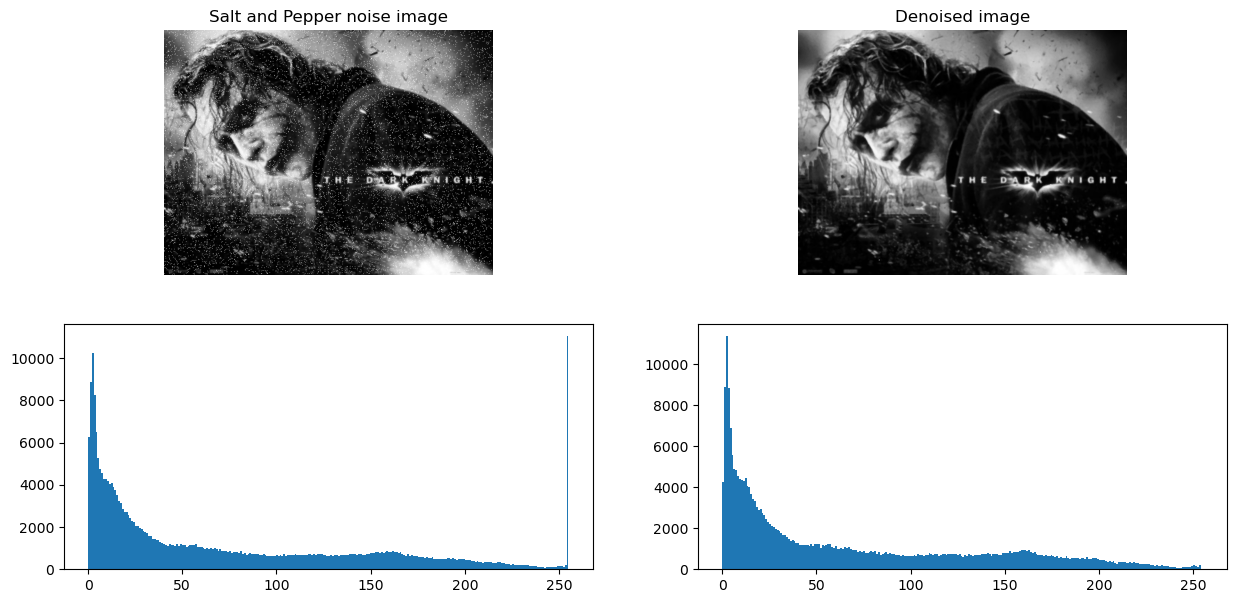

In [3]:
def salt_pepper(image,salt,pepper):
    noisy_image=image.copy()
    total_pxl = image.shape[0] * image.shape[1]
    salt_num=int(total_pxl*salt)
    salt_coord=[np.random.randint(0,i-1,salt_num) for i in image.shape]
    noisy_image[salt_coord[0],salt_coord[1]]=255
    pepp_num=int(total_pxl*pepper)
    pepp_coord=[np.random.randint(0,i-1,pepp_num) for i in image.shape]
    noisy_image[pepp_coord[0],pepp_coord[1]]=255
    return noisy_image
sp_noise=salt_pepper(image,0.02,0.02)
sp_denoised = cv2.medianBlur(sp_noise, 3)
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.imshow(sp_noise,cmap='gray')
plt.axis('off')
plt.title('Salt and Pepper noise image')
plt.subplot(2,2,2)
plt.imshow(sp_denoised,cmap='gray')
plt.axis('off')
plt.title('Denoised image')
plt.subplot(2,2,3)
plt.hist(sp_noise.ravel(),bins=256,range=(0,255))
plt.subplot(2,2,4)
plt.hist(sp_denoised.ravel(),bins=256,range=(0,255))
plt.show()

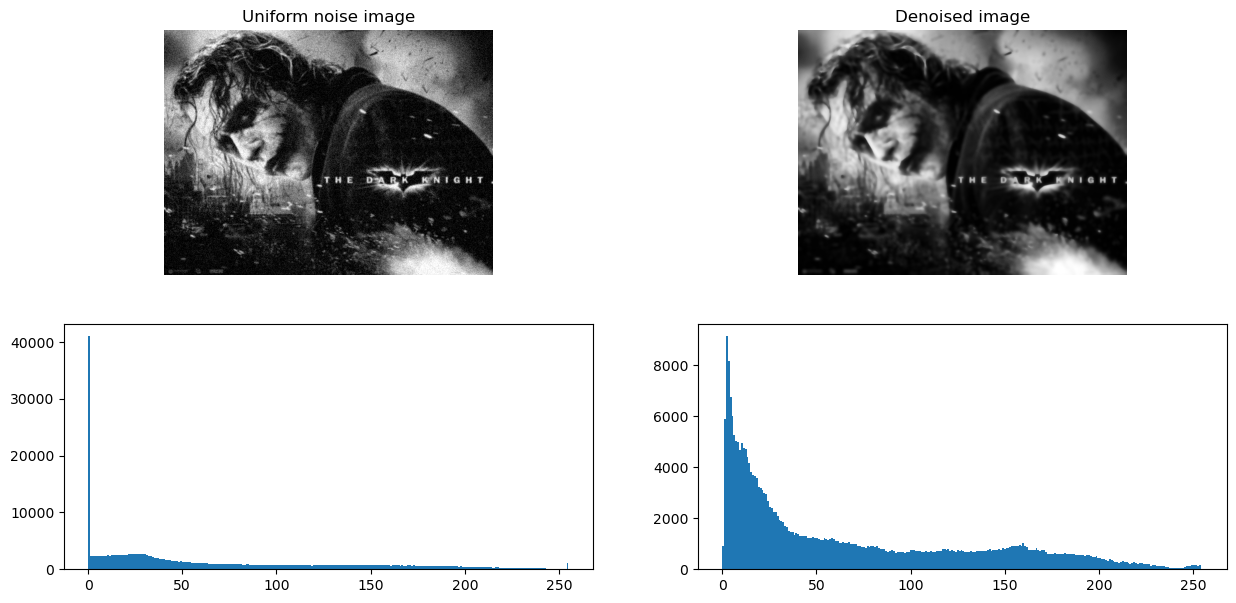

In [4]:
def uniform_noise(image,noise_lvl):
    noise=np.random.uniform(-noise_lvl,noise_lvl,image.shape).astype(np.int16)
    noisy_image = image.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)
denoised_un=cv2.bilateralFilter(image,9,75,75)
uniform_nimg=uniform_noise(image,30)
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.imshow(uniform_nimg,cmap='gray')
plt.axis('off')
plt.title('Uniform noise image')
plt.subplot(2,2,2)
plt.imshow(denoised_un,cmap='gray')
plt.axis('off')
plt.title('Denoised image')
plt.subplot(2,2,3)
plt.hist(uniform_nimg.ravel(),bins=256,range=(0,255))
plt.subplot(2,2,4)
plt.hist(denoised_un.ravel(),bins=256,range=(0,255))
plt.show()

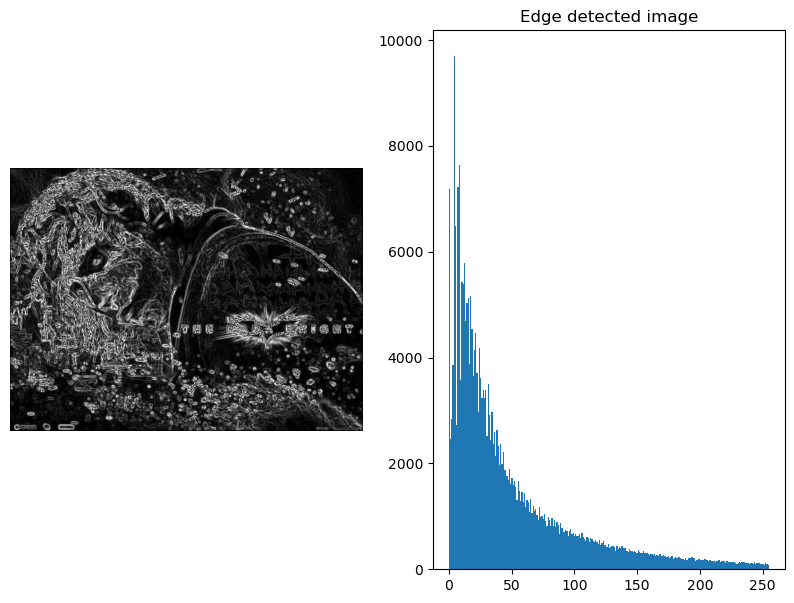

In [5]:
def sobel(image):
    sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y=sobel_x.T
    h,w=image.shape
    g_x = np.zeros((h, w), dtype=np.float32)
    g_y = np.zeros((h, w), dtype=np.float32)
    for i in range(1,h-1):
        for j in range(1,w-1):
            region=image[i-1:i+2,j-1:j+2]
            gx=np.sum(region*sobel_x)
            gy=np.sum(region*sobel_y)
            g_x[i,j]=gx
            g_y[i,j]=gy
    sobel_magnitude=np.sqrt(g_x**2+g_y**2)
    sobel_magnitude = np.uint8(sobel_magnitude)
    return sobel_magnitude
Edge_detected=sobel(image)
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(Edge_detected,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(Edge_detected.ravel(),bins=256,range=(0,255))
plt.title('Edge detected image')
plt.show()